GPUni tekshirish

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
!pip install fastai==2.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 7.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<1.11,>=1.7.0 (from fastai) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1)
ERROR: No matching distribution found for torch<1.11,>=1.7.0


In [3]:
import fastai
import torch
print(fastai.__version__)
print(torch.__version__)

2.7.14
2.2.1+cu121


In [4]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 112MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.181435,0.017417,0.994587,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.060030,0.035984,0.991204,00:51
1,0.027492,0.003637,0.999323,00:49


In [5]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlilik ehtimologi: 1.000


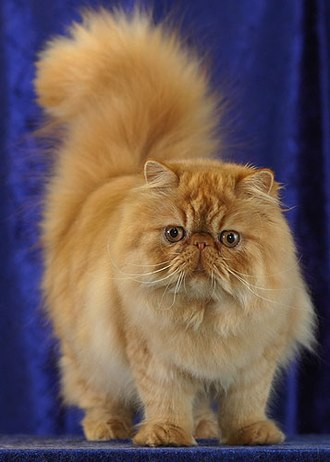

In [7]:
img = PILImage.create(upload.data[0]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img

Mushukmi?: True
Aniqlilik ehtimologi: 1.000


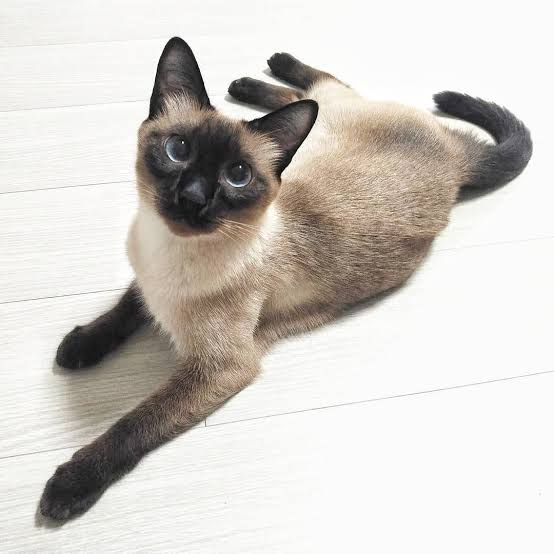

In [9]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img

Mushukmi?: False
Aniqlilik ehtimologi: 0.00000


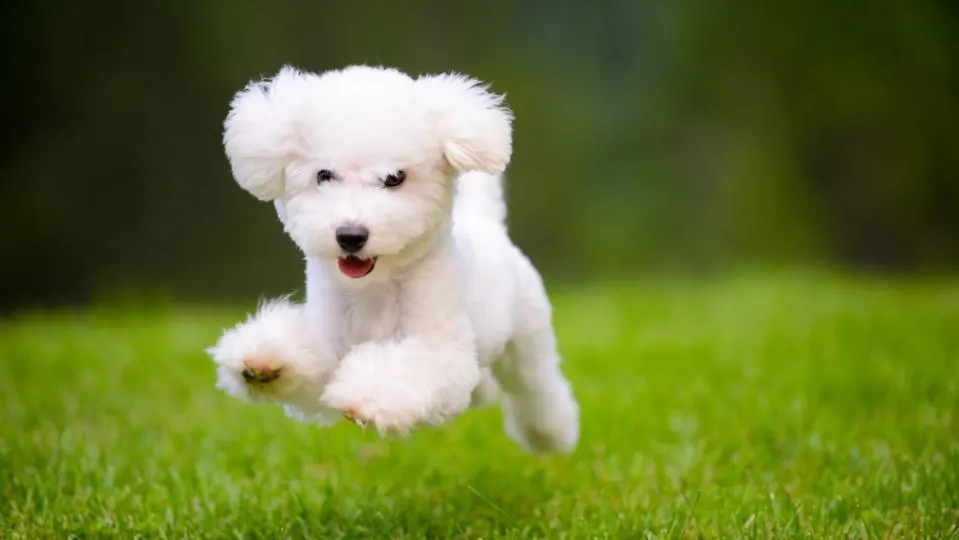

In [21]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.5f}')
img

In [22]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')